In [1]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Reproduction and analysis of an energy use academic paper.
This notebook serves the purpose to reproduce and attempt to replicate some of the findings in the mentioned paper, ensuring that the paper is legitimate in nature. In addition to this, subjective exploration of the data will be conducted that was not included in the paper, as-well as using sklearn RFE to select the best features and compare the results in this notebook to the results in the paper.
Sourced from:http://dx.doi.org/10.1016/j.enbuild.2017.01.083

## Loading Data

The data that is going to be used is the entire data set "energydata_complete.csv", <comment about what is in the data>
    
Variables: 

 - date time year-month-day,  hour:minute:second 
 - Appliances, energy use in Wh
 - lights, energy use of light fixtures in the house in Wh
 - T1, Temperature in kitchen area, in Celsius
 - RH_1, Humidity in kitchen area, in %
 - T2, Temperature in living room area, in Celsius
 - RH_2, Humidity in living room area, in %
 - T3, Temperature in laundry room area
 - RH_3, Humidity in laundry room area, in %
 - T4, Temperature in office room, in Celsius
 - RH_4, Humidity in office room, in %
 - T5, Temperature in bathroom, in Celsius 
 - RH_5, Humidity in bathroom, in %
 - T6, Temperature outside the building (north side), in Celsius
 - RH_6, Humidity outside the building (north side), in %
 - T7, Temperature in ironing room , in Celsius
 - RH_7, Humidity in ironing room, in %
 - T8, Temperature in teenager room 2, in Celsius
 - RH_8, Humidity in teenager room 2, in %
 - T9, Temperature in parents room, in Celsius
 - RH_9, Humidity in parents room, in %
 - To, Temperature outside (from Chièvres weather station), in Celsius
 - Pressure (from Chièvres weather station), in mm Hg
 - RH_out, Humidity outside (from Chièvres weather station), in %
 - Windspeed (from Chièvres weather station), in m/s
 - Visibility (from Chièvres weather station), in km
 - Tdewpoint (from Chièvres weather station), °C
 - rv1, Random variable 1, nondimensional
 - rv2, Rnadom variable 2, nondimensional
    

In [2]:
training = pd.read_csv("data/training.csv")
testing = pd.read_csv("data/testing.csv")
energy = pd.read_csv("data/energydata_complete.csv")

energy['date'] = pd.to_datetime(energy['date'])
energy.set_index('date', inplace=True)

training['date'] = pd.to_datetime(training['date'])
training.set_index('date', inplace=True)

testing['date'] = pd.to_datetime(testing['date'])
testing.set_index('date', inplace=True)

## Exploratory analysis of random variables
We will only conduct exploratory analysis on some initial variables to see what we can expect, as there are 28 variables in the data. They have been chosen randomly, as there are 28 variables in total.

In [3]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
energy.shape

(19735, 28)

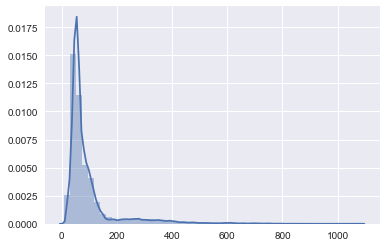

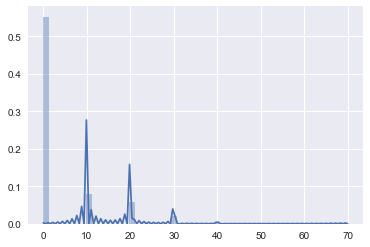

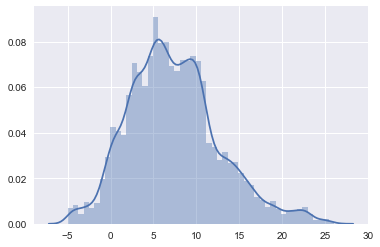

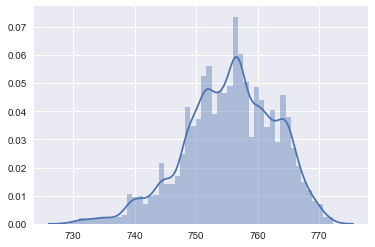

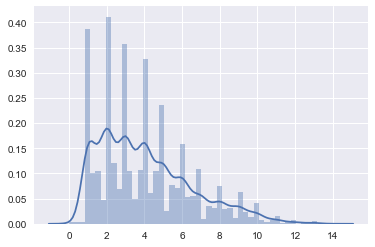

In [5]:
sns.distplot(energy[['Appliances']])
plt.show()

sns.distplot(energy[['lights']])
plt.show()

sns.distplot(energy[['T_out']])
plt.show()

sns.distplot(energy[['Press_mm_hg']])
plt.show()

sns.distplot(energy[['Windspeed']])
plt.show()

In [6]:
energy.head(20)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702


We can see that from the exploratory analysis, that each variable has majorly different distributions. As-well, we can see that the data is relatively large with 19,735 observations. By quickly scrolling through the above cell, each data point is collected at a 10 minute interval.

## Reproduction and analysis

First set of plots shown, which are in the original paper as "Fig. 7. (A) Appliances energy consumption measurement for the whole period, (B) A closer look at the first week of data.". 

I have simply just created two line plots and made some adjustments (axis labeling, colours, etc) and the result is essentially identical to the one in the paper. 

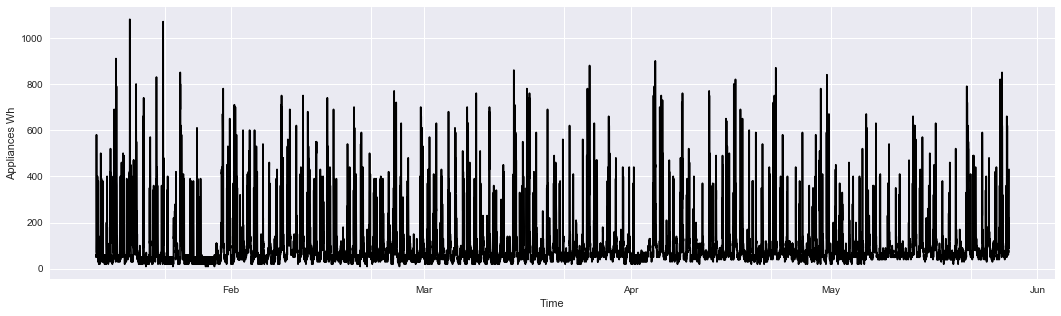

In [7]:
plt.figure(figsize=(18,5))
sns.lineplot(data = energy, x = energy.index, y='Appliances', color = 'black').set(
    ylabel='Appliances Wh', 
    xlabel='Time',
    xticklabels=['', 'Feb', '', 'Mar', '', 'Apr', '', 'May', '', 'Jun'])
plt.show()

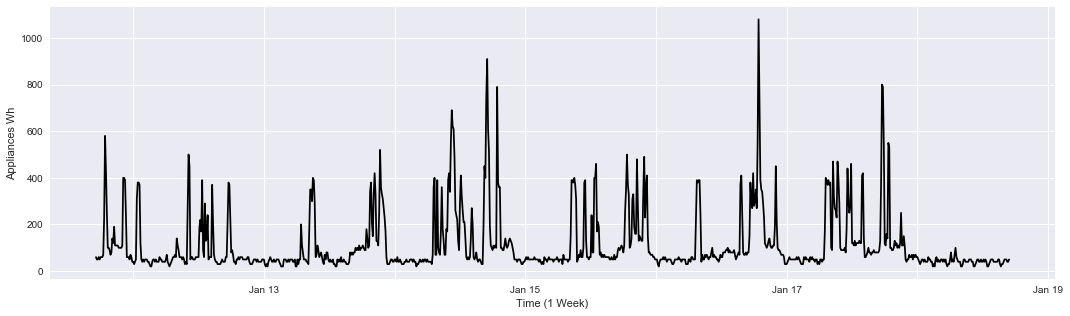

In [8]:
plt.figure(figsize=(18,5))
sns.lineplot(data = energy, x = energy.index[1:1008], y=energy['Appliances'][1:1008], color = 'black').set(
    ylabel='Appliances Wh', 
    xlabel='Time (1 Week)',
    xticklabels=['', 'Jan 13', '', 'Jan 15', '', 'Jan 17', '', 'Jan 19'])
plt.show()

The next two graphs are recreations of "Fig. 8. Appliances energy consumption distribution. Top: histogram, bottom: boxplot. The histogram shows the frequency of energy consumption in the interval (bar width), and the boxplot shows the location of the median with the black line." as shown in the paper

For the first graph, it is a histogram with Appliances Wh being plotted against the frequency. This plot replication is interesting, because in the R code, they used breaks = 40 (which I am assuming is synonymous with bins), however I had to use bins = 55 to replicate the plot.

The second graph however, is essentially identical to the one in the paper. It is simply a boxplot of the Appliances Wh showing the spread. 

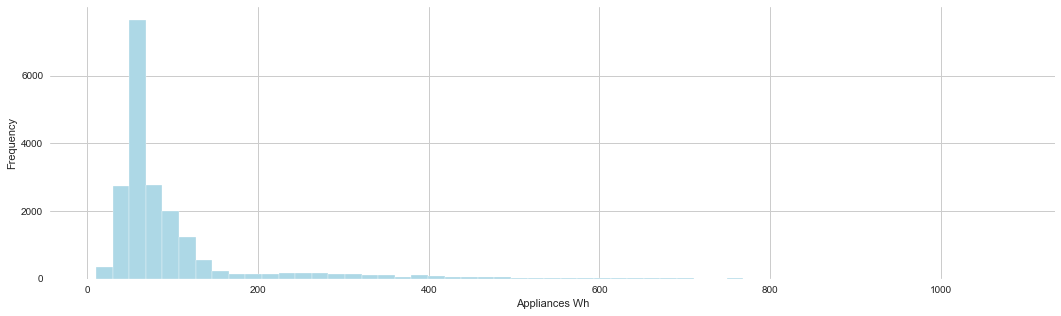

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,5))
hist = sns.distplot(energy['Appliances'], kde=False, rug=False, color='lightblue', hist_kws=dict(alpha=1), bins = 55)
hist.set(
    ylabel='Frequency', 
    xlabel='Appliances Wh')
hist.set_yticks(np.linspace(0,6000,4))
plt.show()

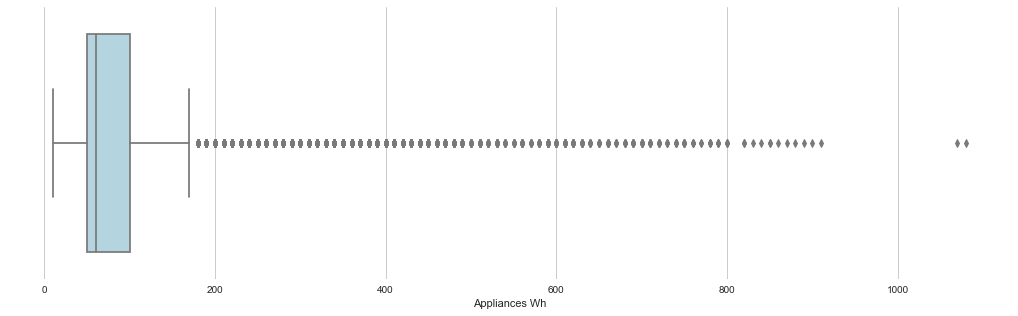

In [10]:
plt.figure(figsize=(18,5))
box = sns.boxplot(energy['Appliances'], color='lightblue')
box.set(
    ylabel='', 
    xlabel='Appliances Wh')
plt.show()

The below pairplot essentially matches Fig 9 in the paper, I however have not placed the variable named in the diagonal boxes as it is trival 

<Figure size 1296x360 with 0 Axes>

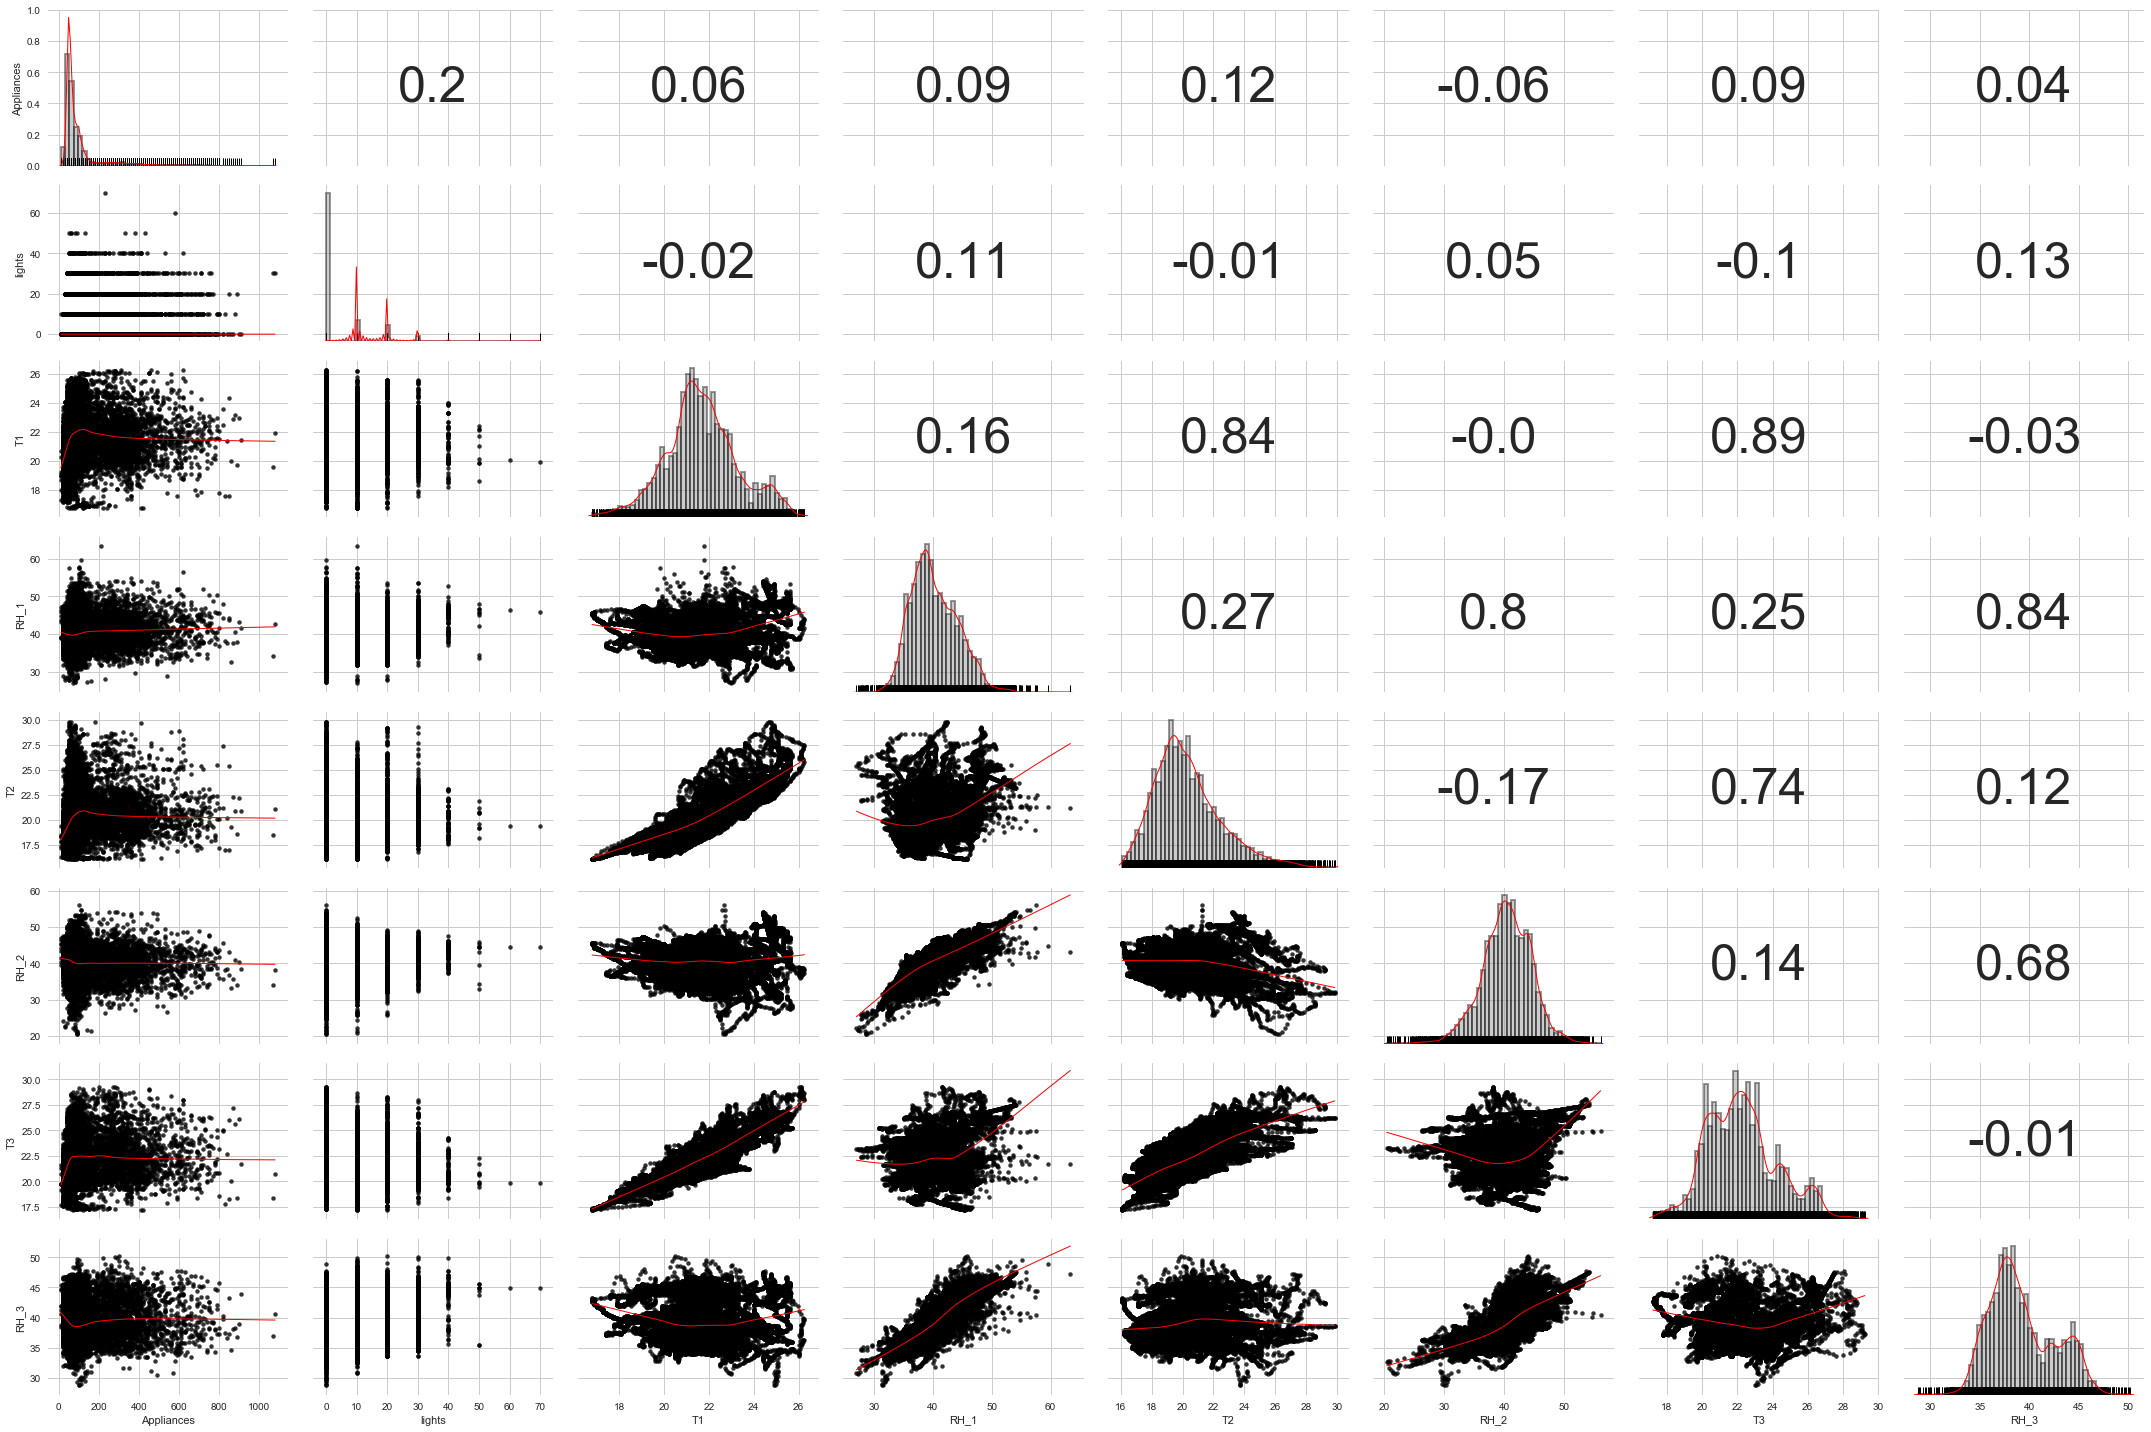

In [11]:
#Help from: https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another/50690729#50690729
plt.figure(figsize=(18,5))
PairPlot = energy[['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3']]

def corr(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize= 50)
    
g = sns.PairGrid(PairPlot, aspect=1.5, diag_sharey=False, despine=False)

g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})

g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})

g.map_diag(sns.rugplot, color='black')
g.map_upper(corr)


# Linear regression and basic RFE

Converting week status and days of week of training and testing data frames into dummy variables 

In [12]:
training_weeksbinary = pd.get_dummies(training['WeekStatus'])
training_daysbinary = pd.get_dummies(training['Day_of_week'])
training_binary = training_weeksbinary.join(training_daysbinary)

testing_weeksbinary = pd.get_dummies(testing['WeekStatus'])
testing_daysbinary = pd.get_dummies(testing['Day_of_week'])
testing_binary = testing_weeksbinary.join(testing_daysbinary)

new_train_data = training.join(training_binary)
new_test_data = testing.join(testing_binary)

In [13]:
new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1).shape

(14803, 37)

matches shape shown in line 499 in the paper code

In [14]:
new_test_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1).shape

(4932, 37)

matches shape shown in line 504 in the paper code

In [15]:
X_train = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1)
Y_train = new_train_data['Appliances']

X_test = new_test_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1)
Y_test = new_test_data['Appliances']

model = LinearRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print("MSE:", mean_squared_error(Y_test, predicted))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, predicted)))
print("R^2:", r2_score(Y_test, predicted))

MSE: 8681.847902503363
RMSE: 93.17643426587735
R^2: 0.15900712778675563


The linear model I have created is essentially, if not completely identical to the results found in the paper. The RSME and R squared values in the paper are 93.18 and 0.16 respectively.


In [16]:
feature_cols = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1).columns
estimator = LinearRegression()
selector = RFE(estimator)  
selector = selector.fit(X_train, Y_train)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)

# test the model
predicted = selector.predict(X_test)
print("MSE:", mean_squared_error(Y_test, predicted))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, predicted)))
print("R^2:", r2_score(Y_test, predicted))

Selected features: Index(['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T8', 'RH_8', 'T9', 'T_out',
       'Weekday', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')
Coeffs: [ 16.92371855 -18.15383266 -14.1707256   24.12465729   5.92793575
   6.04242307  11.68305444  -6.77673394 -22.69565325  -5.299162
  -4.25587334   9.11185527   7.88862704   9.51475174  -5.25887841
  -7.44215349  -9.30762011  -4.50658205]
MSE: 8967.866327018066
RMSE: 94.69881903708233
R^2: 0.13130110724369037


The most basic form of RFE provides subpar results, both the RSME and R squared values are negatively effected. RSME has increased and R squared value has decreased, this could be a result of possibly overfitting the  variables, leading to decreased performance. Similarly, the top variables chosen do not match the variable ranking in the paper, however in the final cells, it is much different. Below is the RSME plotted against variables chosen with the standard RFE, I am not sure how to replicate the plot with RFECV + RandomForestRegressor.

In [17]:
feature_cols = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1).columns
Variables = list(range(1,36))
RSME_scores = []
for i in Variables:
    estimator = LinearRegression()
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, Y_train)
    supp = selector.get_support()
    predicted = selector.predict(X_test)
    RSME_scores.append(np.sqrt(mean_squared_error(Y_test, predicted)))

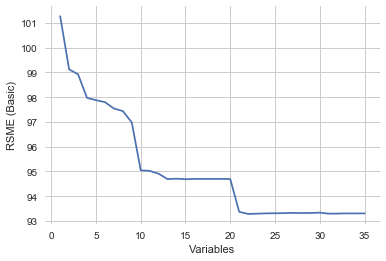

In [18]:
RSMEPlot = sns.lineplot(x=Variables, y=RSME_scores)
RSMEPlot.set(xlabel='Variables', ylabel='RSME (Basic)')
plt.show()

The following is figure 13 in the paper, Residuals and appliances’ energy consumption plot of the lm model. Matches the figure
well.

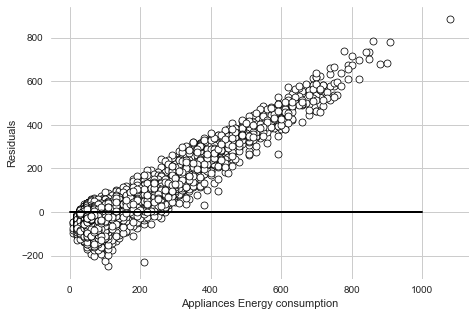

In [19]:
plt.figure(figsize=(7.5,5)) # Figsize of 7.5, 5 essentially matches dimensions of one in paper
yHat = model.predict(X_train)
residuals = new_train_data['Appliances'] - yHat
sns.scatterplot(new_train_data['Appliances'], residuals, color='white', edgecolor='black', alpha=1)
plt.ylabel('Residuals')
plt.xlabel('Appliances Energy consumption')
plt.plot([1000, 0], [0, 0], linewidth=2, color= 'black')
plt.show()

# RFE with cross-validation and RandomForestRegressor

The first cell contains 100 n_estimators for RFECV & RandomForestRegressor, it took 30 minutes to run on a powerful machine. If you want to run the second cell with n_estimators = 500, it will take a significantly long time and it would be wise to undertake this on a well equipped computer.

The results of the first cell are impressive, considering RSME has dropped by >20, and the R squared value is much better in regards to the linear model. With n_estimators = 500, I would say that similar, if not identical results to the paper would be obtained. With n_estimators = 100, the results of my RFECV with RandomForestRegressor are a R squared value of 0.52 (0.02 less than the papers' result) and a RSME of 70.60 (2.12 more than the paper's result). Finally, all of the selected variables in order of importance match those in the paper up to windspeed. With n_estimators = 500, I can confidently assert that identical results will be obtained.

In [8]:
from sklearn.ensemble import RandomForestRegressor
feature_cols = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1).columns
X_train2 = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1)
Y_train2 = new_train_data['Appliances']
estimator = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs= -1)
selector = RFECV(estimator, cv = 10)  
selector = selector.fit(X_train2, Y_train2)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
#print("Coeffs:", selector.estimator_.coef_)


# test the model
predicted = selector.predict(X_test)
print("MSE:", mean_squared_error(Y_test, predicted))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, predicted)))
print("R^2:", r2_score(Y_test, predicted))

Selected features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'Friday', 'Monday', 'Saturday'],
      dtype='object')
MSE: 4983.107725060827
RMSE: 70.59113064019323
R^2: 0.5172965334904648


In [ ]:
from sklearn.ensemble import RandomForestRegressor
feature_cols = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1).columns
X_train2 = new_train_data.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis=1)
Y_train2 = new_train_data['Appliances']
estimator = RandomForestRegressor(n_estimators=500, random_state=1, n_jobs= -1)
selector = RFECV(estimator, cv = 10)  
selector = selector.fit(X_train2, Y_train2)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
#print("Coeffs:", selector.estimator_.coef_)


# test the model
predicted = selector.predict(X_test)
print("MSE:", mean_squared_error(Y_test, predicted))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, predicted)))
print("R^2:", r2_score(Y_test, predicted))